In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy

# Variantes CRB1

## GnomAD

In [2]:
gnomad_crb1 = pd.read_json("data/Gnomad_crb1.json", lines = True)
gnomad_crb1.head()

,CHROM,START_POS,END_POS,dbSNP,REF,ALT,AC,AF,TYPE,CANONICAL,...,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,EXON
0,1,197241517,197241518,[rs1335507706],G,C,1,0.000032,snv,YES,...,0.0,0.000000,0.0,0.000115,0.0,0.000000,0.0,0.000057,0.000000,NaN
1,1,197239998,197239999,[rs1318432555],C,T,1,0.000032,snv,YES,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN
2,1,197240222,197240225,[rs1383439447],GGA,G,1,0.000032,del,YES,...,0.0,0.000469,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN
3,1,197239286,197239287,[rs945705379],A,G,5,0.000159,snv,YES,...,0.0,0.000000,0.0,0.000229,0.0,0.006897,0.0,0.000286,0.000000,NaN
4,1,197241224,197241225,[rs1322562610],G,T,1,0.000032,snv,YES,...,0.0,0.000468,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000072,NaN


In [3]:
gnomad_crb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20355 entries, 0 to 20354
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CHROM        20355 non-null  int64  
 1   START_POS    20355 non-null  int64  
 2   END_POS      20355 non-null  int64  
 3   dbSNP        20355 non-null  object 
 4   REF          20355 non-null  object 
 5   ALT          20355 non-null  object 
 6   AC           20355 non-null  int64  
 7   AF           20355 non-null  float64
 8   TYPE         20355 non-null  object 
 9   CANONICAL    20355 non-null  object 
 10  Consequence  20355 non-null  object 
 11  Symbol       20355 non-null  object 
 12  INTRON       18216 non-null  object 
 13  HGVSc        18610 non-null  object 
 14  popmax       18987 non-null  object 
 15  AF_popmax    18987 non-null  float64
 16  AF_nfe       20355 non-null  float64
 17  AF_fin       20350 non-null  float64
 18  AF_est       20353 non-null  float64
 19  AF_n

In [4]:
pd.set_option('display.max_columns', None)
gnomad_crb1 = gnomad_crb1.explode('dbSNP')
gnomad_crb1[['Transcript ID', 'HGVSc']] = gnomad_crb1['HGVSc'].str.split(':', n=1, expand=True)

In [5]:
gnomad_crb1 = gnomad_crb1.dropna(subset=['HGVSc', 'popmax'])
#gnomad_crb1_filt= gnomad_crb1[(gnomad_crb1["Consequence"] != "intron_variant") & (gnomad_crb1["Consequence"] != "intron_variant&non_coding_transcript_variant")]
#gnomad_crb1_filt.info()
gnomad_crb1.head()

,CHROM,START_POS,END_POS,dbSNP,REF,ALT,AC,AF,TYPE,CANONICAL,Consequence,Symbol,INTRON,HGVSc,popmax,AF_popmax,AF_nfe,AF_fin,AF_est,AF_nwe,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,EXON,Transcript ID
0,1,197241517,197241518,rs1335507706,G,C,1,0.000032,snv,YES,intron_variant,CRB1,1/11,c.70+3906G>C,afr,0.000115,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000115,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3
1,1,197239998,197239999,rs1318432555,C,T,1,0.000032,snv,YES,intron_variant,CRB1,1/11,c.70+2387C>T,nfe,0.000065,0.000065,0.0,0.0,0.000116,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3
2,1,197240222,197240225,rs1383439447,GGA,G,1,0.000032,del,YES,intron_variant,CRB1,1/11,c.70+2613_70+2614delAG,nfe,0.000065,0.000065,0.0,0.0,0.000000,0.0,0.000469,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3
3,1,197239286,197239287,rs945705379,A,G,5,0.000159,snv,YES,intron_variant,CRB1,1/11,c.70+1675A>G,afr,0.000229,0.000065,0.0,0.0,0.000116,0.0,0.000000,0.0,0.000229,0.0,0.006897,0.0,0.000286,0.000000,NaN,ENST00000367400.3
4,1,197241224,197241225,rs1322562610,G,T,1,0.000032,snv,YES,intron_variant,CRB1,1/11,c.70+3613G>T,nfe,0.000065,0.000065,0.0,0.0,0.000000,0.0,0.000468,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000072,NaN,ENST00000367400.3


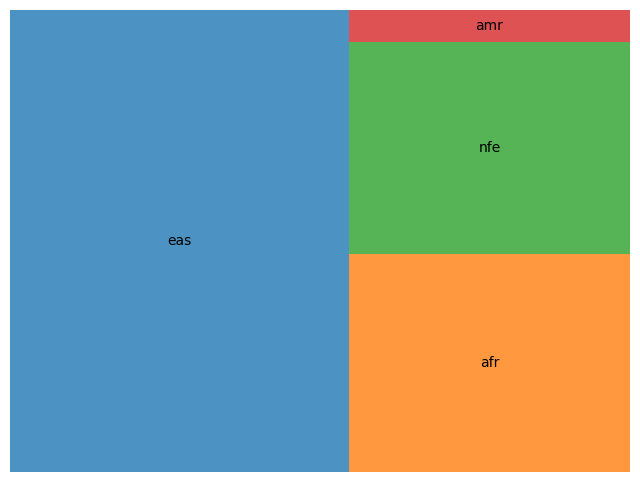

In [6]:
import squarify

data = gnomad_crb1.groupby("popmax").sum()['AC'].sort_values(ascending=False)

plt.figure(figsize=(8,6))
squarify.plot(sizes=data.values, label=data.index, alpha=.8, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.axis('off')
plt.show()

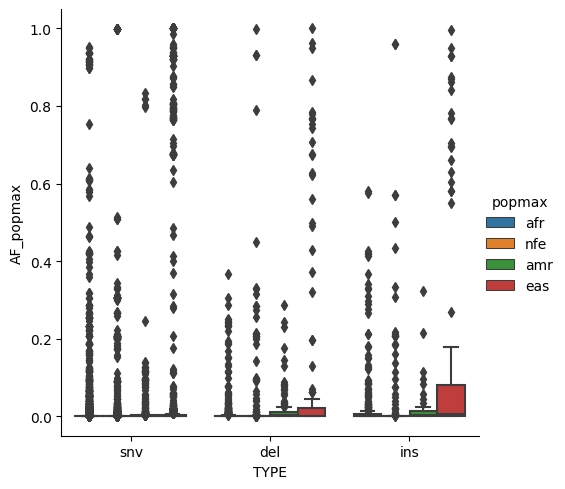

In [7]:
sns.catplot(x="TYPE", y="AF_popmax", hue="popmax", kind="box", data=gnomad_crb1);

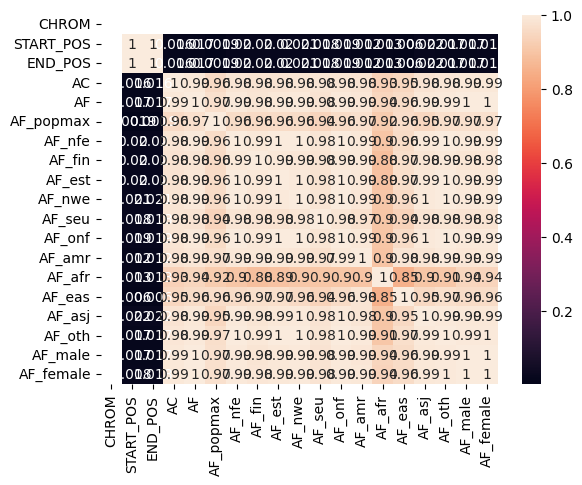

In [8]:
sns.heatmap(gnomad_crb1.corr(numeric_only=True), annot=True);
#sns.pairplot(gnomad_crb1)
#sns.plt.show()

# ClinVar

In [10]:
clinvar_crb1 = pd.read_csv("data/raw/clinvar_result.txt", sep='\t')
clinvar_crb1.head(n=2)

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,NM_201253.2(CRB1):c.-204C>T,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294665,1.0,197237339,1.0,197268209,294665,279527,rs544047392,NC_000001.11:197268208:C:T,NaN
1,NM_201253.2(CRB1):c.-195G>A,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294666,1.0,197237348,1.0,197268218,294666,278311,rs886045782,NC_000001.11:197268217:G:A,NaN


In [11]:
clinvar_crb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   1448 non-null   object 
 1   Gene(s)                                1448 non-null   object 
 2   Protein change                         806 non-null    object 
 3   Condition(s)                           1448 non-null   object 
 4   Clinical significance (Last reviewed)  1448 non-null   object 
 5   Review status                          1448 non-null   object 
 6   Accession                              1448 non-null   object 
 7   GRCh37Chromosome                       1446 non-null   float64
 8   GRCh37Location                         1446 non-null   object 
 9   GRCh38Chromosome                       1439 non-null   float64
 10  GRCh38Location                         1439 non-null   object 
 11  Vari

In [12]:
clinvar_crb1[['RefSeq', 'HGVSc']] = clinvar_crb1['Name'].str.split(':', n=1, expand=True)
clinvar_crb1[['HGVSc', 'HGVSp']] = clinvar_crb1['HGVSc'].str.split(pat=' ', n=1, expand=True)
clinvar_crb1[['START_POS', 'END_POS']] = clinvar_crb1['GRCh37Location'].str.split(pat=' - ', n=1, expand=True)
clinvar_crb1[['ClinSign', 'ClinReview']] = clinvar_crb1['Clinical significance (Last reviewed)'].str.split('(', n=1, expand=True)
clinvar_crb1.head(n=2)

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15,RefSeq,HGVSc,HGVSp,START_POS,END_POS,ClinSign,ClinReview
0,NM_201253.2(CRB1):c.-204C>T,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294665,1.0,197237339,1.0,197268209,294665,279527,rs544047392,NC_000001.11:197268208:C:T,NaN,NM_201253.2(CRB1),c.-204C>T,None,197237339,None,Uncertain significance,"Last reviewed: Jan 13, 2018)"
1,NM_201253.2(CRB1):c.-195G>A,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294666,1.0,197237348,1.0,197268218,294666,278311,rs886045782,NC_000001.11:197268217:G:A,NaN,NM_201253.2(CRB1),c.-195G>A,None,197237348,None,Uncertain significance,"Last reviewed: Jan 13, 2018)"


In [13]:
clinvar_crb1[['REF', 'ALT']] = clinvar_crb1['HGVSc'].str.split('>', n=1, expand=True)

In [14]:
clinvar_crb1.loc[clinvar_crb1['END_POS'].isnull(), 'END_POS'] = clinvar_crb1['START_POS']
clinvar_crb1 = clinvar_crb1[clinvar_crb1["Gene(s)"] == "CRB1"]

In [15]:
clinvar_crb1['RefSeq'].unique()

array(['NM_201253.2(CRB1)', 'NM_201253.3(CRB1)', 'NC_000001.10',
       'Single allele', 'CRB1, ALU INS, NT2320'], dtype=object)

In [16]:
clinvar_crb1['RefSeq'] = clinvar_crb1['RefSeq'].replace('NM_201253.2(CRB1)', 'NM_201253')
clinvar_crb1['RefSeq'] = clinvar_crb1['RefSeq'].replace('NM_201253.3(CRB1)', 'NM_201253')
clinvar_crb1 = clinvar_crb1.loc[clinvar_crb1['RefSeq'] == 'NM_201253']
clinvar_crb1.head(n=1)

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15,RefSeq,HGVSc,HGVSp,START_POS,END_POS,ClinSign,ClinReview,REF,ALT
0,NM_201253.2(CRB1):c.-204C>T,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294665,1.0,197237339,1.0,197268209,294665,279527,rs544047392,NC_000001.11:197268208:C:T,NaN,NM_201253,c.-204C>T,None,197237339,197237339,Uncertain significance,"Last reviewed: Jan 13, 2018)",c.-204C,T


In [17]:
ref_value = lambda x: x[-1]
clinvar_crb1['REF'] = clinvar_crb1['REF'].apply(ref_value)
clinvar_crb1 = clinvar_crb1.loc[clinvar_crb1['REF'] != '=']
clinvar_crb1 = clinvar_crb1.loc[clinvar_crb1['REF'] != 'p']
clinvar_crb1['REF'].unique()

array(['C', 'G', 'T', 'A'], dtype=object)

In [18]:
clinvar_crb1 = clinvar_crb1.drop(['GRCh38Chromosome', 'GRCh38Location', 'VariationID', 'AlleleID(s)', 'Canonical SPDI', 'Clinical significance (Last reviewed)', 'Unnamed: 15'], axis=1)

# Unión de tablas GnomAD y ClinVar

In [19]:
merged = pd.merge(gnomad_crb1, clinvar_crb1,
                  how='outer', on="HGVSc")
merged.head()

,CHROM,START_POS_x,END_POS_x,dbSNP,REF_x,ALT_x,AC,AF,TYPE,CANONICAL,Consequence,Symbol,INTRON,HGVSc,popmax,AF_popmax,AF_nfe,AF_fin,AF_est,AF_nwe,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,EXON,Transcript ID,Name,Gene(s),Protein change,Condition(s),Review status,Accession,GRCh37Chromosome,GRCh37Location,dbSNP ID,RefSeq,HGVSp,START_POS_y,END_POS_y,ClinSign,ClinReview,REF_y,ALT_y
0,1.0,197241517.0,197241518.0,rs1335507706,G,C,1.0,0.000032,snv,YES,intron_variant,CRB1,1/11,c.70+3906G>C,afr,0.000115,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000115,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,197239998.0,197239999.0,rs1318432555,C,T,1.0,0.000032,snv,YES,intron_variant,CRB1,1/11,c.70+2387C>T,nfe,0.000065,0.000065,0.0,0.0,0.000116,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,197240222.0,197240225.0,rs1383439447,GGA,G,1.0,0.000032,del,YES,intron_variant,CRB1,1/11,c.70+2613_70+2614delAG,nfe,0.000065,0.000065,0.0,0.0,0.000000,0.0,0.000469,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,197239286.0,197239287.0,rs945705379,A,G,5.0,0.000159,snv,YES,intron_variant,CRB1,1/11,c.70+1675A>G,afr,0.000229,0.000065,0.0,0.0,0.000116,0.0,0.000000,0.0,0.000229,0.0,0.006897,0.0,0.000286,0.000000,NaN,ENST00000367400.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,197241224.0,197241225.0,rs1322562610,G,T,1.0,0.000032,snv,YES,intron_variant,CRB1,1/11,c.70+3613G>T,nfe,0.000065,0.000065,0.0,0.0,0.000000,0.0,0.000468,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000072,NaN,ENST00000367400.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18534 entries, 0 to 18533
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             17351 non-null  float64
 1   START_POS_x       17351 non-null  float64
 2   END_POS_x         17351 non-null  float64
 3   dbSNP             17123 non-null  object 
 4   REF_x             17351 non-null  object 
 5   ALT_x             17351 non-null  object 
 6   AC                17351 non-null  float64
 7   AF                17351 non-null  float64
 8   TYPE              17351 non-null  object 
 9   CANONICAL         17351 non-null  object 
 10  Consequence       17351 non-null  object 
 11  Symbol            17351 non-null  object 
 12  INTRON            16982 non-null  object 
 13  HGVSc             18534 non-null  object 
 14  popmax            17351 non-null  object 
 15  AF_popmax         17351 non-null  float64
 16  AF_nfe            17351 non-null  float6

In [21]:
merged['CHROM'] = merged['CHROM'].fillna(1)
merged.filter(regex='^AF_', axis=1).fillna(0, inplace=True)
merged['Symbol'] = merged['Symbol'].fillna("CRB1")
merged['popmax'] = merged['popmax'].fillna("affected")
merged['RefSeq'] = merged['RefSeq'].fillna(method='bfill')
merged['Transcript ID'] = merged['Transcript ID'].fillna(method='ffill')
merged.loc[merged['START_POS_x'].isnull(), 'START_POS_x'] = merged['START_POS_y']
merged.loc[merged['END_POS_x'].isnull(), 'END_POS_x'] = merged['END_POS_y']
merged.loc[merged['dbSNP'].isnull(), 'dbSNP'] = merged['dbSNP ID']
merged.loc[merged['REF_x'].isnull(), 'REF_x'] = merged['REF_y']
merged.loc[merged['ALT_x'].isnull(), 'ALT_x'] = merged['ALT_y']
merged.loc[merged['AF'] > 0.01, 'ClinSign'] = merged.loc[merged['AF'] > 0.01, 'ClinSign'].fillna("Benign")
merged['ClinSign'] = merged['ClinSign'].fillna("Uncertain significance")
# Selecciona las columnas que empiezan por 'AF'
cols = merged.columns[merged.columns.str.startswith('AF')]

# Sustituye los valores NaN de las columnas seleccionadas por 0
merged[cols] = merged[cols].fillna(0)

C:\Users\crist\AppData\Local\Temp\ipykernel_6756\3709311397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged.filter(regex='^AF_', axis=1).fillna(0, inplace=True)


In [22]:
crb1_variants = merged.drop(['START_POS_y', 'END_POS_y', 'dbSNP ID', 'GRCh37Chromosome', 'GRCh37Location', 'REF_y', 'ALT_y'], axis=1)
crb1_variants['START_POS_x'] = crb1_variants['START_POS_x'].astype(int)
crb1_variants['END_POS_x'] = crb1_variants['END_POS_x'].astype(int)
crb1_variants.tail(n=2)

,CHROM,START_POS_x,END_POS_x,dbSNP,REF_x,ALT_x,AC,AF,TYPE,CANONICAL,Consequence,Symbol,INTRON,HGVSc,popmax,AF_popmax,AF_nfe,AF_fin,AF_est,AF_nwe,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,EXON,Transcript ID,Name,Gene(s),Protein change,Condition(s),Review status,Accession,RefSeq,HGVSp,ClinSign,ClinReview
18532,1.0,197447298,197447298,rs780654592,A,G,NaN,0.0,NaN,NaN,NaN,CRB1,NaN,c.*289A>G,affected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,ENST00000367400.3,NM_201253.3(CRB1):c.*289A>G,CRB1,NaN,Pigmented paravenous retinochoroidal atrophy|L...,"criteria provided, single submitter",VCV000874626,NM_201253,None,Uncertain significance,"Last reviewed: Mar 2, 2018)"
18533,1.0,197447333,197447333,rs190166697,C,A,NaN,0.0,NaN,NaN,NaN,CRB1,NaN,c.*324C>A,affected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,ENST00000367400.3,NM_201253.3(CRB1):c.*324C>A,CRB1,NaN,Pigmented paravenous retinochoroidal atrophy|L...,"criteria provided, single submitter",VCV000874627,NM_201253,None,Uncertain significance,"Last reviewed: Jan 13, 2018)"


In [23]:
crb1_variants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18534 entries, 0 to 18533
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CHROM           18534 non-null  float64
 1   START_POS_x     18534 non-null  int32  
 2   END_POS_x       18534 non-null  int32  
 3   dbSNP           17518 non-null  object 
 4   REF_x           18534 non-null  object 
 5   ALT_x           18519 non-null  object 
 6   AC              17351 non-null  float64
 7   AF              18534 non-null  float64
 8   TYPE            17351 non-null  object 
 9   CANONICAL       17351 non-null  object 
 10  Consequence     17351 non-null  object 
 11  Symbol          18534 non-null  object 
 12  INTRON          16982 non-null  object 
 13  HGVSc           18534 non-null  object 
 14  popmax          18534 non-null  object 
 15  AF_popmax       18534 non-null  float64
 16  AF_nfe          18534 non-null  float64
 17  AF_fin          18534 non-null 

Agrupar variantes por posición en el genoma

In [24]:
crb1_variants['No_alleles'] = crb1_variants['START_POS_x'].map(crb1_variants['START_POS_x'].value_counts())
crb1_variants.head(n=1)

,CHROM,START_POS_x,END_POS_x,dbSNP,REF_x,ALT_x,AC,AF,TYPE,CANONICAL,Consequence,Symbol,INTRON,HGVSc,popmax,AF_popmax,AF_nfe,AF_fin,AF_est,AF_nwe,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,EXON,Transcript ID,Name,Gene(s),Protein change,Condition(s),Review status,Accession,RefSeq,HGVSp,ClinSign,ClinReview,No_alleles
0,1.0,197241517,197241518,rs1335507706,G,C,1.0,0.000032,snv,YES,intron_variant,CRB1,1/11,c.70+3906G>C,afr,0.000115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000115,0.0,0.0,0.0,0.000057,0.0,NaN,ENST00000367400.3,NaN,NaN,NaN,NaN,NaN,NaN,NM_201253,NaN,Uncertain significance,NaN,1


In [26]:
crb1_variants.to_csv('data/processed/crb1_variants.csv', index=False)

## Encontrar puntos críticos en el gen

In [27]:
damaging_variants = crb1_variants[['START_POS_x', 'HGVSc', 'TYPE', 'Consequence', 'popmax', 'ClinSign' , 'Condition(s)', 'No_alleles']]

In [28]:
clin_variants = crb1_variants[['START_POS_x', 'No_alleles', 'ClinSign']]
duplicated_rows = clin_variants[clin_variants.duplicated()]
#damaging_variants.groupby('START_POS_x').count()
#damaging_variants['No_alleles'].value_counts()
clin_variants_unique = clin_variants.drop_duplicates()
clin_variants_unique = clin_variants_unique.sort_values(by='START_POS_x')
clin_variants_unique['ClinSign'].unique()

array(['Uncertain significance', 'Likely benign',
       'Conflicting interpretations of pathogenicity', 'Pathogenic',
       'Likely pathogenic', 'Benign', 'Pathogenic/Likely pathogenic',
       'not provided', 'Benign/Likely benign'], dtype=object)

In [29]:
pathogenic_var = clin_variants_unique[clin_variants_unique['ClinSign'].str.contains('Pathogenic')]
lik_pathogenic_var = clin_variants_unique[clin_variants_unique['ClinSign'].str.contains('ely pathogenic')]
benign_var = clin_variants_unique[clin_variants_unique['ClinSign'].str.contains('enign')]
vus_var = clin_variants_unique.loc[~clin_variants_unique['ClinSign'].isin(pathogenic_var['ClinSign']) & 
                                      ~clin_variants_unique['ClinSign'].isin(lik_pathogenic_var['ClinSign']) & 
                                      ~clin_variants_unique['ClinSign'].isin(benign_var['ClinSign'])]

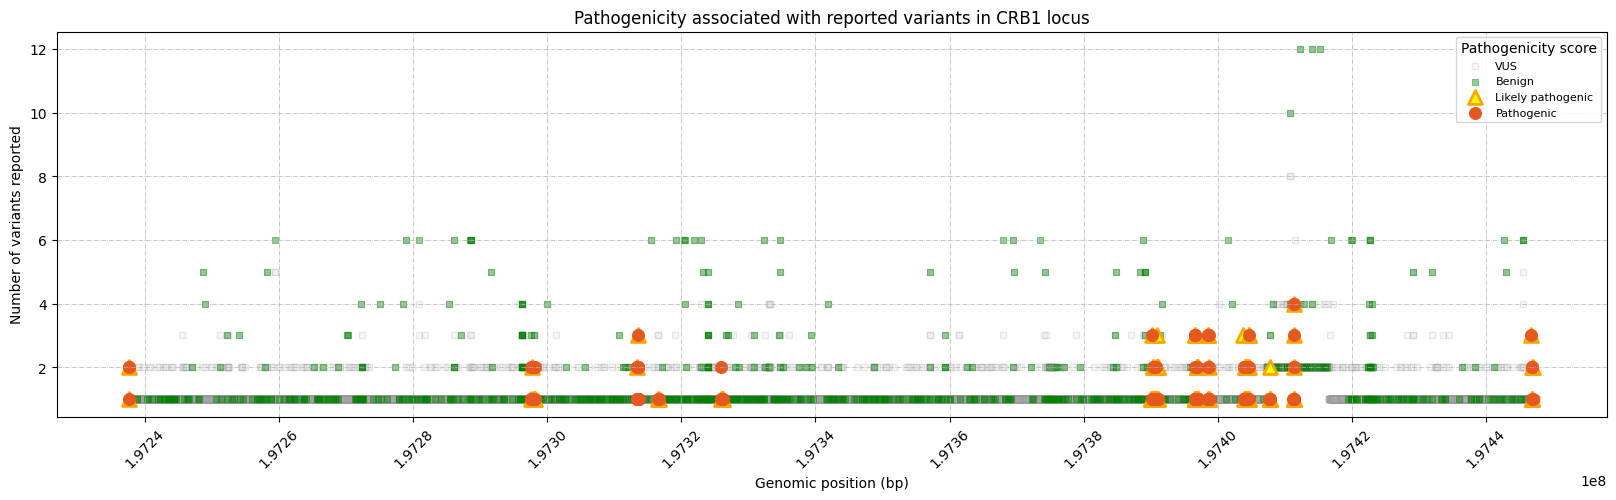

In [30]:
plt.scatter(vus_var['START_POS_x'], vus_var['No_alleles'],
            s=20, color='#DEDEDE', alpha=.2,
            marker ="s",
            edgecolor ='#999999')
plt.scatter(benign_var['START_POS_x'], benign_var['No_alleles'],
            c ="green", s = 20, alpha = 0.4,
            linewidths = 0.8,
            marker ="s",
            edgecolor ="green") 
plt.scatter(lik_pathogenic_var['START_POS_x'], lik_pathogenic_var['No_alleles'],
            c ="yellow", s = 100,
            linewidths = 2,
            marker ="^",
            edgecolor ="orange")
plt.scatter(pathogenic_var['START_POS_x'], pathogenic_var['No_alleles'],
            c = '#E55921', s = 70,
            linewidths = 1,
            marker ="o",
            edgecolor ="#E55921")
plt.xticks(rotation=45, fontsize=10)
plt.locator_params(nbins=12)
plt.grid(which='major', axis='both', linestyle='-.', linewidth=0.5)
plt.legend(['VUS', 'Benign', 'Likely pathogenic', 'Pathogenic'], title="Pathogenicity score",
           loc='upper right', fontsize=8, bbox_to_anchor=(1,1), frameon=True, fancybox=True)
plt.ylabel('Number of variants reported')
plt.xlabel('Genomic position (bp)')
plt.title('Pathogenicity associated with reported variants in CRB1 locus')
plt.gcf().set_size_inches((20, 5))

### Correlación por poblaciones

In [31]:
crb1_variants['popmax'].unique()

array(['afr', 'nfe', 'amr', 'eas', 'affected'], dtype=object)

In [32]:
populations = ['AF_nfe', 'AF_fin', 'AF_est', 'AF_nwe', 'AF_seu', 'AF_onf', 'AF_amr', 'AF_afr', 'AF_eas', 'AF_asj', 'AF_oth']
populations_data = crb1_variants[['START_POS_x'] + populations]
populations_agg = populations_data.groupby('START_POS_x', as_index=False).sum()
populations_agg = populations_agg.dropna ()
populations_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554 entries, 0 to 16553
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_POS_x  16554 non-null  int32  
 1   AF_nfe       16554 non-null  float64
 2   AF_fin       16554 non-null  float64
 3   AF_est       16554 non-null  float64
 4   AF_nwe       16554 non-null  float64
 5   AF_seu       16554 non-null  float64
 6   AF_onf       16554 non-null  float64
 7   AF_amr       16554 non-null  float64
 8   AF_afr       16554 non-null  float64
 9   AF_eas       16554 non-null  float64
 10  AF_asj       16554 non-null  float64
 11  AF_oth       16554 non-null  float64
dtypes: float64(11), int32(1)
memory usage: 1.5 MB


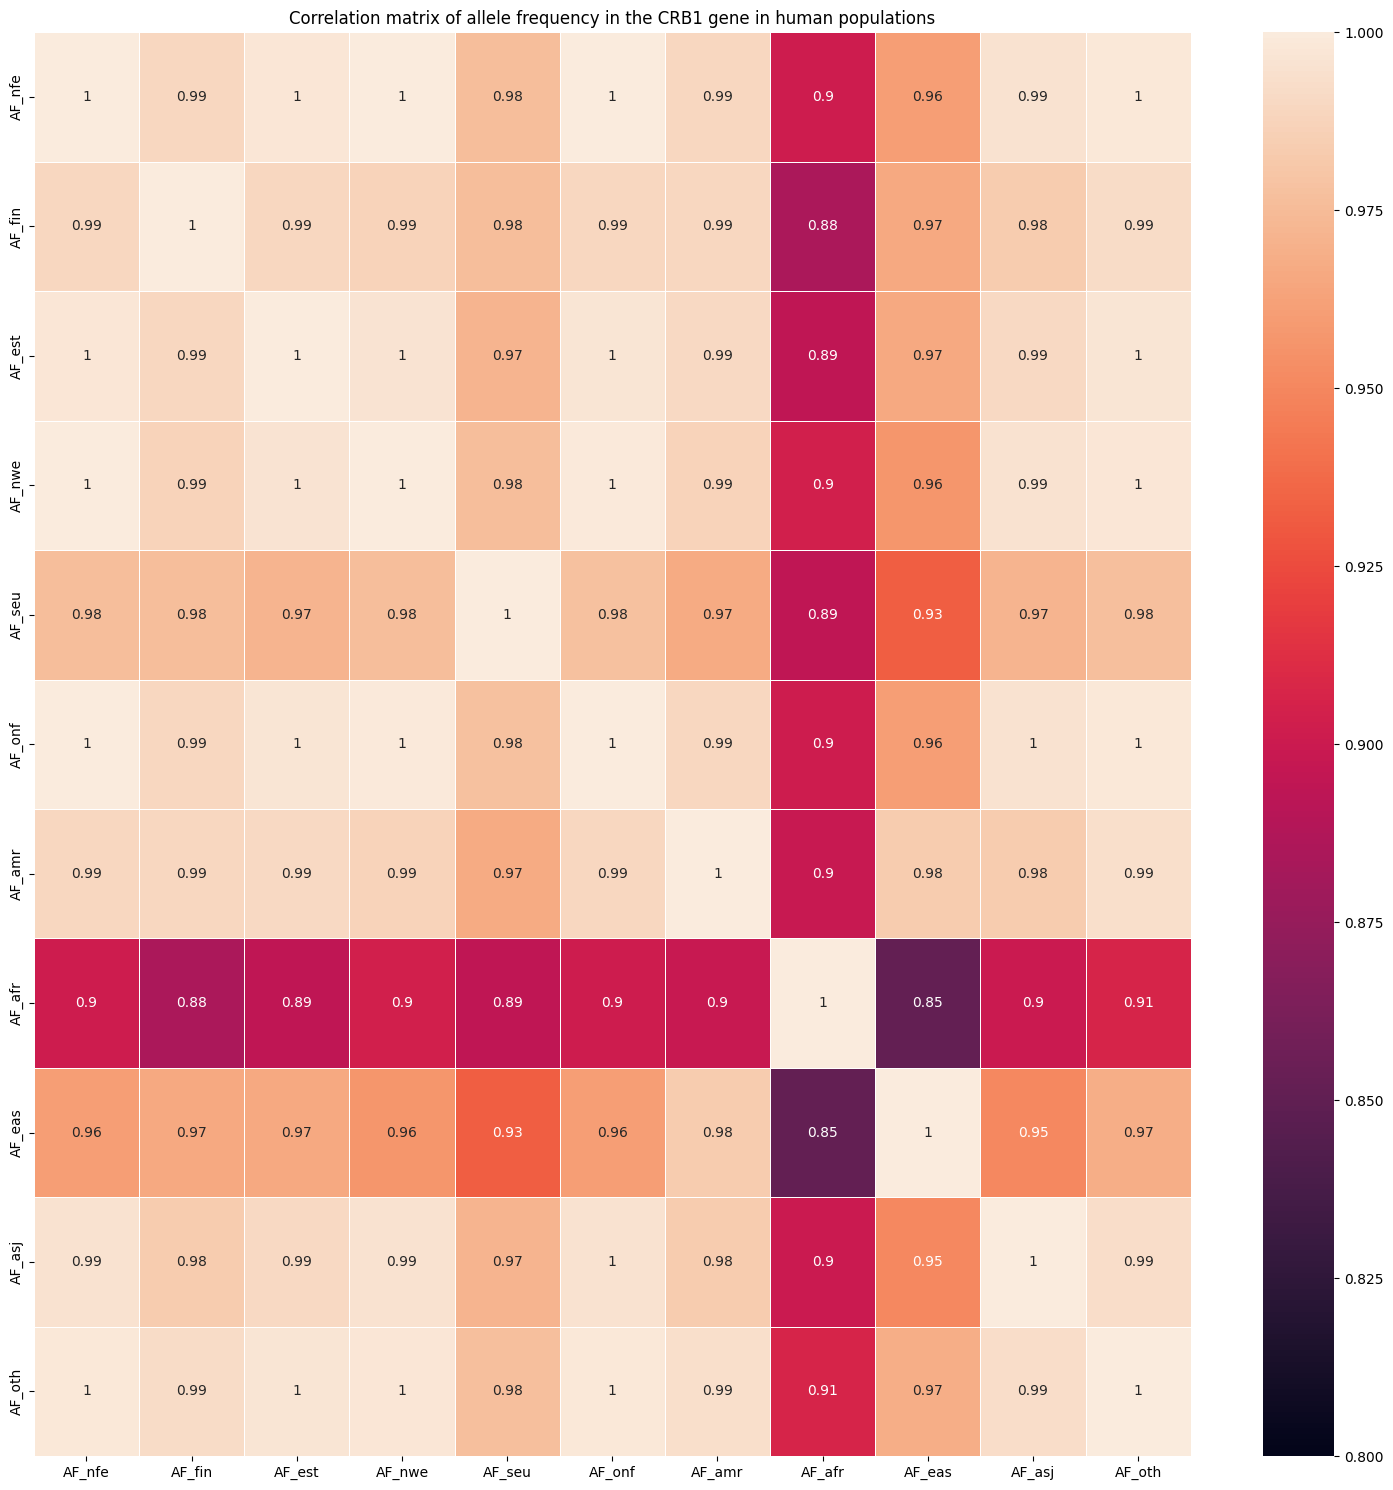

In [33]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(populations_data[populations].corr(numeric_only=True), annot=True,
            linewidths=.5, ax=ax, vmin=.8, vmax=1)

# ajustar los parámetros del gráfico
ax.set_title('Correlation matrix of allele frequency in the CRB1 gene in human populations')
plt.tight_layout()


In [34]:
populations_agg.head()

,START_POS_x,AF_nfe,AF_fin,AF_est,AF_nwe,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth
0,197237339,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,197237348,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,197237487,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,197237488,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,197237503,0.000065,0.0,0.0,0.000116,0.0,0.0,0.0,0.000115,0.0,0.0,0.0


In [35]:
populations_agg.describe()

,START_POS_x,AF_nfe,AF_fin,AF_est,AF_nwe,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth
count,1.655400e+04,16554.000000,16554.000000,16554.000000,16554.000000,16554.000000,16554.000000,16554.000000,16554.000000,16554.000000,16554.000000,16554.000000
mean,1.973448e+08,0.013429,0.013327,0.013452,0.013426,0.013100,0.013434,0.013881,0.012894,0.014377,0.013071,0.013550
std,5.961890e+04,0.103314,0.103228,0.104114,0.103066,0.101293,0.103278,0.105940,0.088165,0.113283,0.101768,0.103602
min,1.972373e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.972960e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.973445e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.973968e+08,0.000065,0.000000,0.000000,0.000116,0.000000,0.000000,0.000000,0.000230,0.000000,0.000000,0.000000
max,1.974476e+08,1.999612,2.000000,2.000000,1.999302,2.000000,2.000000,1.992924,1.864524,2.000000,2.000000,1.992648


In [36]:
df_melted = pd.melt(populations_agg, id_vars=['START_POS_x'], 
                    value_vars=['AF_nfe', 'AF_fin', 'AF_est', 'AF_nwe', 'AF_seu', 'AF_onf', 'AF_amr', 'AF_afr', 'AF_eas', 'AF_asj', 'AF_oth'], 
                    var_name='population', 
                    value_name='AF')
df_melted['population'] = df_melted['population'].str.replace('AF_', '')
df_melted['population'].unique()

array(['nfe', 'fin', 'est', 'nwe', 'seu', 'onf', 'amr', 'afr', 'eas',
       'asj', 'oth'], dtype=object)

<Axes: xlabel='population', ylabel='AF'>

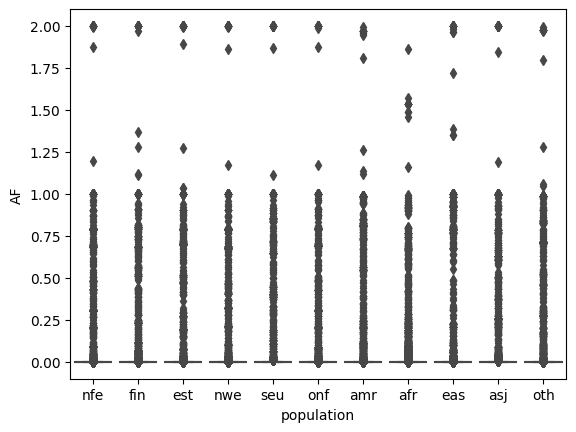

In [37]:
sns.boxplot(x="population", y="AF", data=df_melted)

# Ayuda

In [178]:
#sns.clustermap(populations_agg[populations], metric="correlation", method="single", cmap="Blues")
#plt.show()

Población y consecuencia en la proteína

In [136]:
pop_consequence = crb1_variants[['START_POS_x', 'HGVSc', 'TYPE', 'Consequence', 'ClinSign', 'popmax']]
pop_consequence.dropna(inplace=True)
pop_consequence = pop_consequence[pop_consequence["Consequence"] != "intron_variant"]

C:\Users\crist\AppData\Local\Temp\ipykernel_6756\3150967281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_consequence.dropna(inplace=True)


In [137]:
pop_consequence['ClinSign'] = pop_consequence['ClinSign'].replace(to_replace='.*ely benign.*', value=2, regex=True)
pop_consequence['ClinSign'] = pop_consequence['ClinSign'].replace(to_replace='Benign', value=1, regex=True)
pop_consequence['ClinSign'] = pop_consequence['ClinSign'].replace(to_replace='.*ely pathogenic.*', value=4, regex=True)
pop_consequence['ClinSign'] = pop_consequence['ClinSign'].replace(to_replace='Pathogenic', value=5, regex=True)
pop_consequence.loc[~pop_consequence['ClinSign'].isin([1, 2, 4, 5]), 'ClinSign'] = 3
pop_consequence['ClinSign'] = pop_consequence['ClinSign'].astype(int)

In [145]:
pop_consequence.columns

Index(['START_POS_x', 'HGVSc', 'TYPE', 'Consequence', 'ClinSign', 'popmax',
       'cDNA_Position', 'Exon'],
      dtype='object')

<Figure size 3000x1000 with 0 Axes>

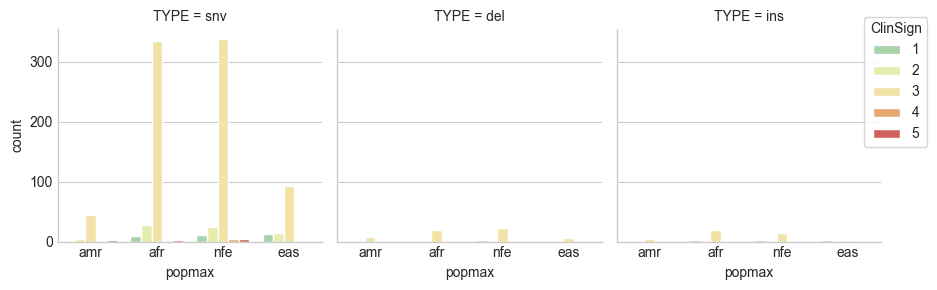

In [139]:
pop_consequence.head()
plt.figure(figsize=(30,10));
plot = sns.catplot(x="popmax",
            col="TYPE",
            hue="ClinSign",
            col_wrap=3,
            height= 3,
            data=pop_consequence,
            palette=['#a2d9a4', '#edf8a3', '#fee999', '#fca55d', '#e2514a'],
            kind="count");
sns.move_legend(plot, "upper left", bbox_to_anchor=(.9, .95), frameon=True);

In [42]:
print(sns.color_palette("Spectral").as_hex())

['#e2514a', '#fca55d', '#fee999', '#edf8a3', '#a2d9a4', '#47a0b3']


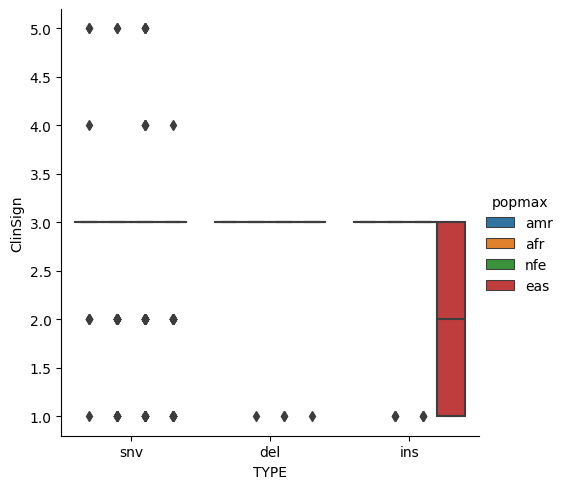

In [43]:
sns.catplot(x="TYPE", y="ClinSign", hue="popmax", kind = "box", data=pop_consequence);

In [140]:
pop_consequence['cDNA_Position'] = pop_consequence['HGVSc'].str.extract(r'(-?\d+)')
pop_consequence['cDNA_Position'] = pop_consequence['cDNA_Position'].astype(int)
pop_consequence.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037 entries, 175 to 17253
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   START_POS_x    1037 non-null   int32 
 1   HGVSc          1037 non-null   object
 2   TYPE           1037 non-null   object
 3   Consequence    1037 non-null   object
 4   ClinSign       1037 non-null   int32 
 5   popmax         1037 non-null   object
 6   cDNA_Position  1037 non-null   int32 
dtypes: int32(3), object(4)
memory usage: 52.7+ KB


In [141]:
table = pd.read_html('https://databases.lovd.nl/shared/refseq/CRB1_NM_201253.2_table.html')
crb1_transcript = table[0]
crb1_transcript.loc[11, 'c.endExon'] = 4006+792
crb1_transcript.loc[11, 'lengthIntron']=0
crb1_transcript['c.endExon'] = crb1_transcript['c.endExon'].astype(int)
crb1_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   exon          12 non-null     int64  
 1   c.startExon   12 non-null     int64  
 2   c.endExon     12 non-null     int32  
 3   g.startExon   12 non-null     int64  
 4   g.endExon     12 non-null     int64  
 5   lengthExon    12 non-null     int64  
 6   lengthIntron  12 non-null     float64
dtypes: float64(1), int32(1), int64(5)
memory usage: 756.0 bytes


In [179]:
def find_exon(row):
    pos = int(row['cDNA_Position'])
    for idx, exon in crb1_transcript.iterrows():
        if pos >= exon['c.startExon'] and pos <= exon['c.endExon']:
            return exon['exon']
        if row['Consequence']=='3_prime_UTR_variant':
            return crb1_transcript['exon'].max()
    return None

In [142]:
def find_exon(num_pos):
    for idx, row in crb1_transcript.iterrows():
        if row['c.startExon'] <= num_pos <= row['c.endExon']:
            if '3_prime_UTR_variant' in pop_consequence['Consequence'].values:
                return crb1_transcript['exon'].max()
            return row['exon']
    return None

In [180]:
pop_consequence['Exon'] = pop_consequence.apply(find_exon, axis=1)
pop_consequence['Exon'] = pop_consequence['Exon'].astype(int)
pop_consequence.loc[pop_consequence['Consequence'].str.contains('splice'), 'Consequence'] = 'splice_variant'
pop_consequence.loc[pop_consequence['Consequence'].str.contains('non'), 'Consequence'] = 'non_coding'

In [183]:
pop_consequence[pop_consequence["Exon"]==1]

,START_POS_x,HGVSc,TYPE,Consequence,ClinSign,popmax,cDNA_Position,Exon
175,197237540,c.-2C>T,snv,5_prime_UTR_variant,3,amr,-2,1
178,197237503,c.-39C>T,snv,5_prime_UTR_variant,3,afr,-39,1
179,197237545,c.4G>A,snv,missense_variant,3,nfe,4,1
403,197237570,c.29T>C,snv,missense_variant,3,nfe,29,1
742,197447026,c.*18G>A,snv,3_prime_UTR_variant,3,afr,18,1
...,...,...,...,...,...,...,...,...
13280,197332980,n.35T>C,snv,non_coding,3,nfe,35,1
14252,197332959,n.14T>C,snv,non_coding,3,eas,14,1
15240,197332972,n.27C>G,snv,non_coding,3,afr,27,1
16088,197332971,n.26C>T,snv,non_coding,3,nfe,26,1


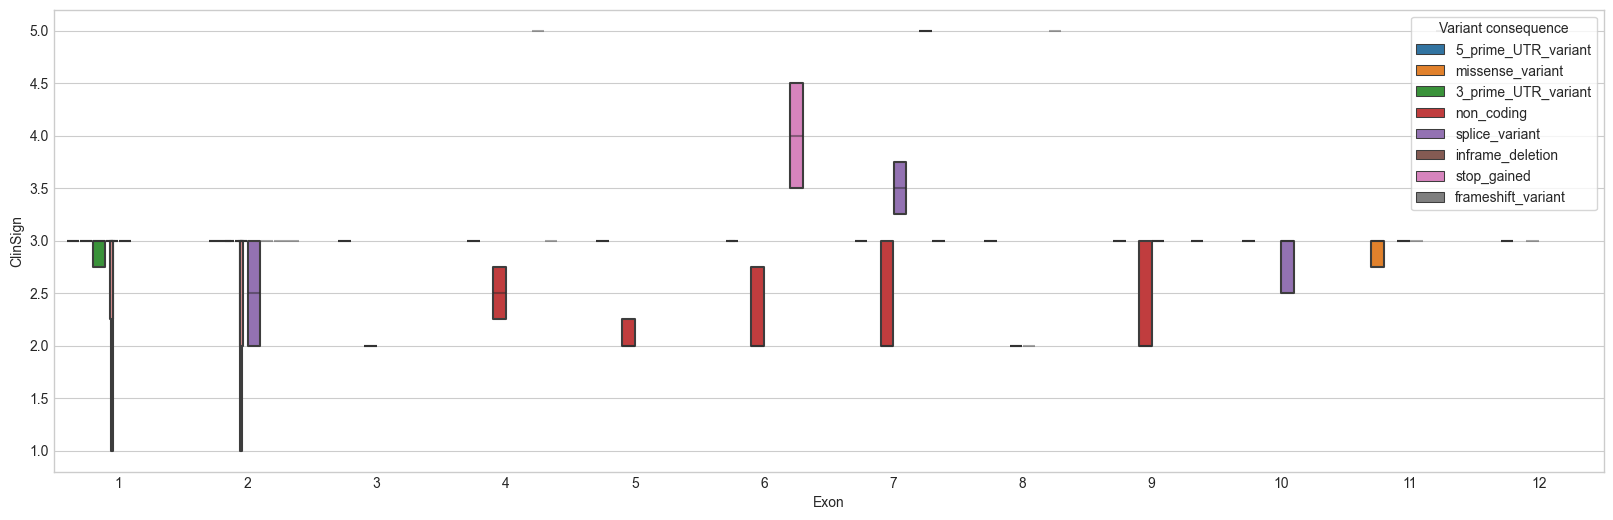

In [173]:
plt.figure(figsize=(20,6))
box_plot = sns.boxenplot(data= pop_consequence, x="Exon", y="ClinSign", hue="Consequence", showfliers=False);
ax = plt.gca()
ax.legend(loc='upper right',  title="Variant consequence", frameon = True, fancybox =True, )

C:\Users\crist\AppData\Local\Temp\ipykernel_6756\1631531607.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=pop_consequence, x="Exon", hue="Consequence", cut=0,


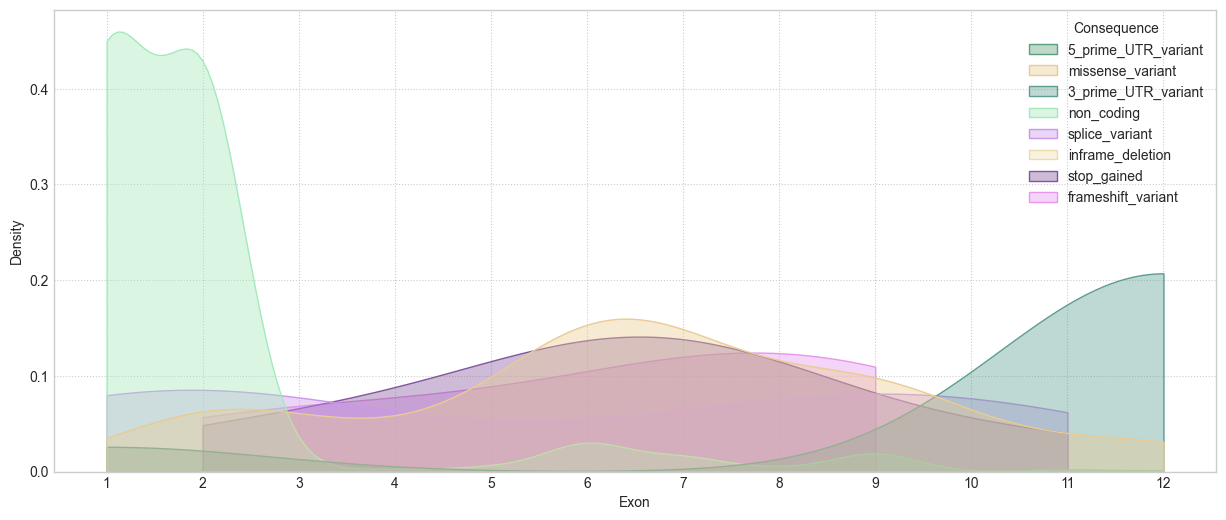

In [193]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=pop_consequence, x="Exon", hue="Consequence", cut=0,
            fill=True, common_norm=False, alpha=0.4,
            palette=['#5D9E7C', '#EACB93', '#5D9E91', '#A3EABA', '#CC96EB', '#EBDCAE', '#84559E', '#E797EB'])
plt.locator_params(axis="x", nbins=24)
plt.show()

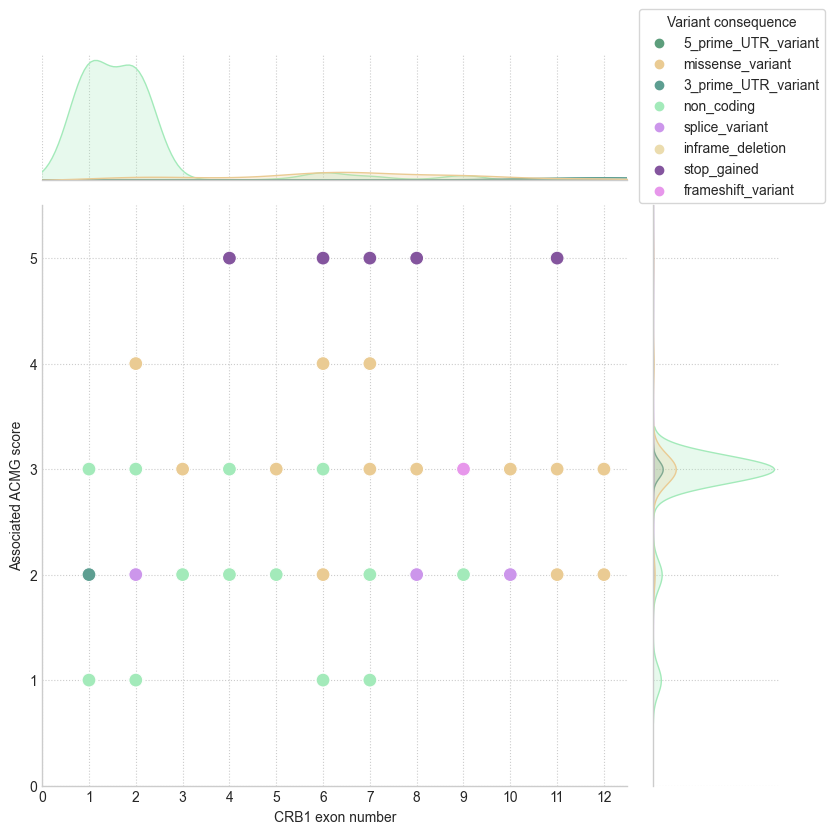

In [191]:
sns.set_style("whitegrid", {"grid.linestyle": ":"})
#plot = sns.scatterplot(x="Exon", y="ClinSign", hue="Consequence", data=pop_consequence, s=100, marker ="o");
#plot = sns.catplot(x="Exon", y="ClinSign", hue="Consequence", kind="box", data=pop_consequence);
plot=sns.jointplot(data=pop_consequence, x="Exon", y="ClinSign", hue="Consequence", height = 8,
              marker="o", s=100, ratio=4, space=.2, dropna=False, xlim=(0, 12.5), kind="scatter",
              ylim=(0, 5.5), palette=['#5D9E7C', '#EACB93', '#5D9E91', '#A3EABA', '#CC96EB', '#EBDCAE', '#84559E', '#E797EB'])
#sns.move_legend(plot, "upper left", bbox_to_anchor=(.4, 1), ncol=8, frameon=False);
plt.ylabel('Associated ACMG score')
plt.xlabel('CRB1 exon number')
ax = plt.gca()
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.35), title="Variant consequence", frameon = True, fancybox =True, )
plt.locator_params(axis="x", nbins=24)
#plt.title('Pathogenicity distribution of variants in CRB1')
#plt.gcf().set_size_inches((25,8))

In [218]:
def group_consequence(consequence):
    if consequence in ["splice_variant", 'stop_gained', 'frameshift_variant']:
        return 'null_variant'
    else:
        return 'not_null_var'

In [226]:
new_column = pop_consequence['Consequence'].apply(group_consequence)
consequence_df = pd.DataFrame({
    'Consequence': new_column,
    'ClinSign': pop_consequence['ClinSign'],
    'Exon': pop_consequence['Exon']
})
consequence_df['Consequence'].describe()

count             1037
unique               2
top       not_null_var
freq              1006
Name: Consequence, dtype: object

# Images

C:\Users\crist\AppData\Local\Temp\ipykernel_6756\1930870496.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


[Text(0, 0, 'Uncertain significance'),
 Text(1, 0, 'Benign'),
 Text(2, 0, 'Conflicting interpretations of pathogenicity'),
 Text(3, 0, 'Likely benign'),
 Text(4, 0, 'Benign/Likely benign'),
 Text(5, 0, 'Pathogenic/Likely pathogenic'),
 Text(6, 0, 'Pathogenic'),
 Text(7, 0, 'Likely pathogenic'),
 Text(8, 0, 'not provided')]

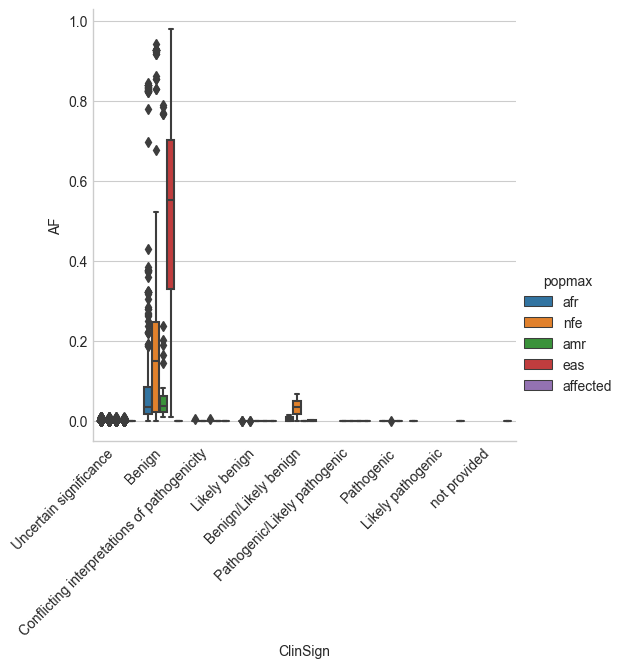

In [50]:
plt.style.use('seaborn-whitegrid')
chart= sns.catplot(x="ClinSign", y="AF", hue="popmax", kind="box", data=crb1_variants);
chart.ax.set_xticklabels(chart.ax.get_xticklabels(), ha="right", rotation=45)
#plt.legend(framealpha=1, frameon=True);
#sns.jointplot(x=crb1_variants["AC"], y=crb1_variants["AF"], kind='scatter')
#sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='hex')